# Filter warnings

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading data Set

In [2]:
import pandas as pd

In [3]:
DiamondPriceData = pd.read_csv("F:/Course/Pandas/Csv/DiamondPricesData.csv")

In [4]:
DiamondPriceData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


# Problem Statement

# Removing Duplicate values

In [5]:
#removing duplicates values
print("Shape Before removving Duplicates values: ", DiamondPriceData.shape)

DiamondPriceData = DiamondPriceData.drop_duplicates()
print("Shape After removving Duplicates values: ", DiamondPriceData.shape)

Shape Before removving Duplicates values:  (53940, 10)
Shape After removving Duplicates values:  (53794, 10)


# Missing Data Treatment

In [6]:
DiamondPriceData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [7]:
#Column color and depth has missing data 
#Replacing continous columns missing data with mean of the column
#Replacing Categorical Columns missing data with mode of the column
DiamondPriceData['color'].fillna(value=DiamondPriceData['color'].mode()[0],inplace=True)
DiamondPriceData['depth'].fillna(value=DiamondPriceData['depth'].mean(),inplace=True) 

In [8]:
#rechecking if their is any missing data remaining 
DiamondPriceData.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Basic Data Exploration 

In [9]:
#looking for sample rows in data
DiamondPriceData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [10]:
# Observing the summarized information of data

DiamondPriceData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53794 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53794 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [11]:
# Looking at the descriptive statistics of the data
DiamondPriceData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429762,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [12]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondPriceData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        185
table        127
x            554
y            552
z            375
dtype: int64

# Basic Data Exploration Results

# Visual Exploratory Data Analysis

# Visualize distribution of all the Categorical Predictor variables in the data using Bar Plot

In [13]:
#since we do not have a fucntion for plotting multiple bar plot a once we creat our own function to create bar plots 
def PlotBarCharts(inpData,colsToPlot):
    #importing matplotlib
    import matplotlib.pyplot as plt 
    #Generating multiples subplots
    fig,subPlot = plt.subplots(nrows=1,ncols=len(colsToPlot),figsize = (20,5)) 
    fig.suptitle("Bar Chart of :" + str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

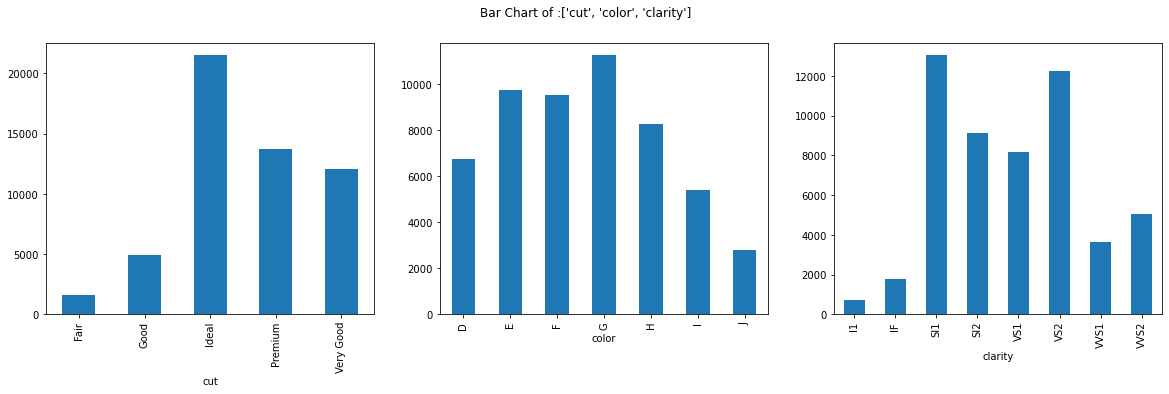

In [14]:
#plotting bar chart for categorical data using the function 
PlotBarCharts(inpData=DiamondPriceData,colsToPlot=['cut','color','clarity'])

# Bar charts interpretation

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

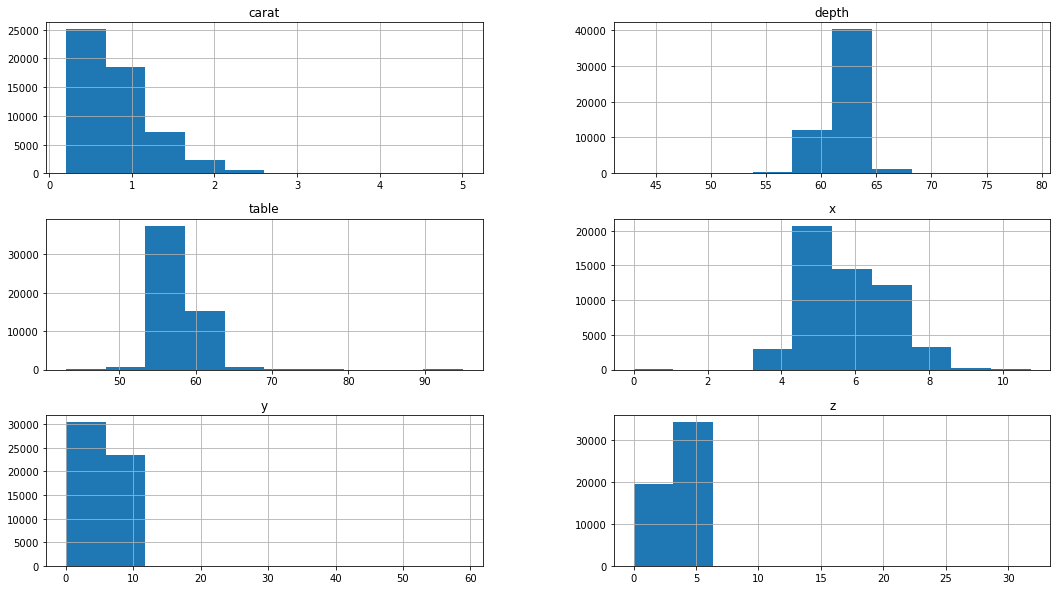

In [15]:
DiamondPriceData.hist(['carat', 'depth', 'table', 'x','y','z'],figsize=(18,10))

# Feature Selection

# Visual exploration of relationship between variables

# Statistical measurement of relationship strength between variables

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts

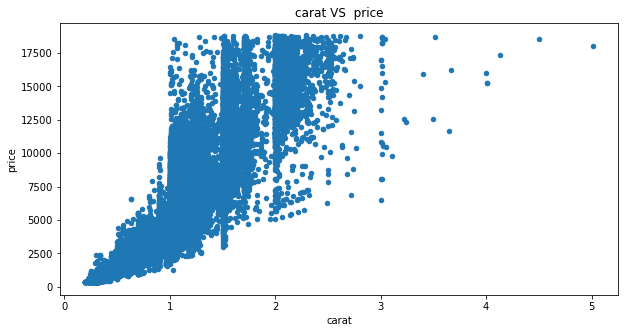

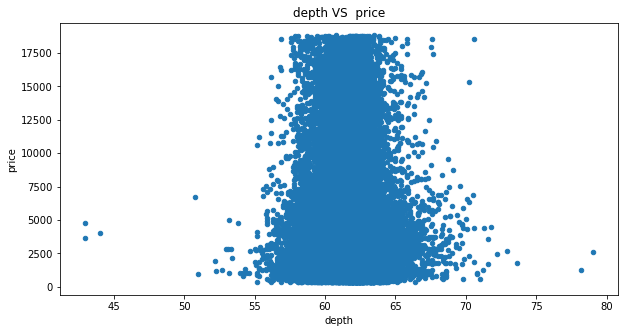

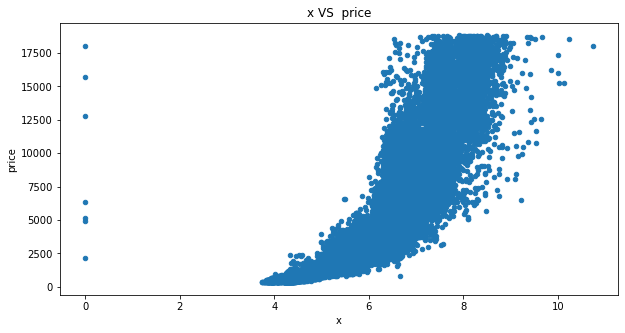

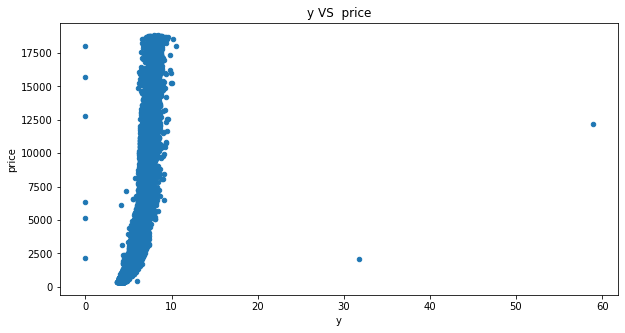

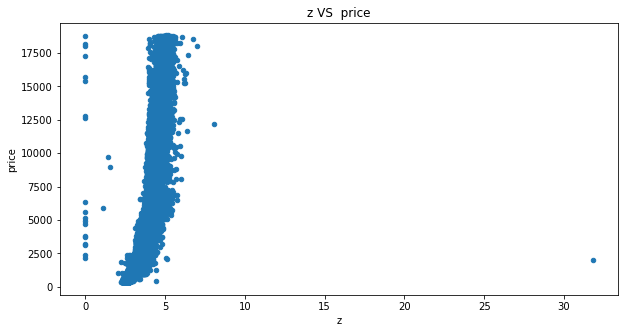

In [16]:
con = ['carat','depth','x','y','z']

for predictor in con:
    DiamondPriceData.plot.scatter(x=predictor,y="price",figsize=(10,5),title = predictor + " VS " + " price")

# Outliers seen in Scatter plots

For columns Carat and Depth distributions seems fine but for X,Y,Z columns outliers are easily spotted 

# Replacing outliers for 'x' column

In [17]:
DiamondPriceData['x'][DiamondPriceData['x']>2].sort_values(ascending = True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [18]:
#replacing Outliers
DiamondPriceData['x'][DiamondPriceData['x']<2] = 3.73

# Replacing outliers for 'y' column

In [19]:
DiamondPriceData['y'][DiamondPriceData['y']>3].sort_values(ascending =True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    31.80
24067    58.90
Name: y, Length: 53788, dtype: float64

In [20]:
#Replacing Outliers below 3 and above 11
DiamondPriceData['y'][DiamondPriceData['y']<3] = 3.68
DiamondPriceData['y'][DiamondPriceData['y']>11] = 10.54

# Replacing outliers for 'z' column

In [21]:
DiamondPriceData['z'][DiamondPriceData['z']>2].sort_values(ascending = True)

39246     2.06
31592     2.24
47138     2.25
31591     2.26
14        2.27
         ...  
27130     6.43
27630     6.72
27415     6.98
24067     8.06
48410    31.80
Name: z, Length: 53772, dtype: float64

In [22]:
#Replacing Outliers below 2 and above 7
DiamondPriceData['z'][DiamondPriceData['z']<2] = 2.06
DiamondPriceData['z'][DiamondPriceData['z']>7] = 6.98

# Looking at the scatter charts again after outlier removal

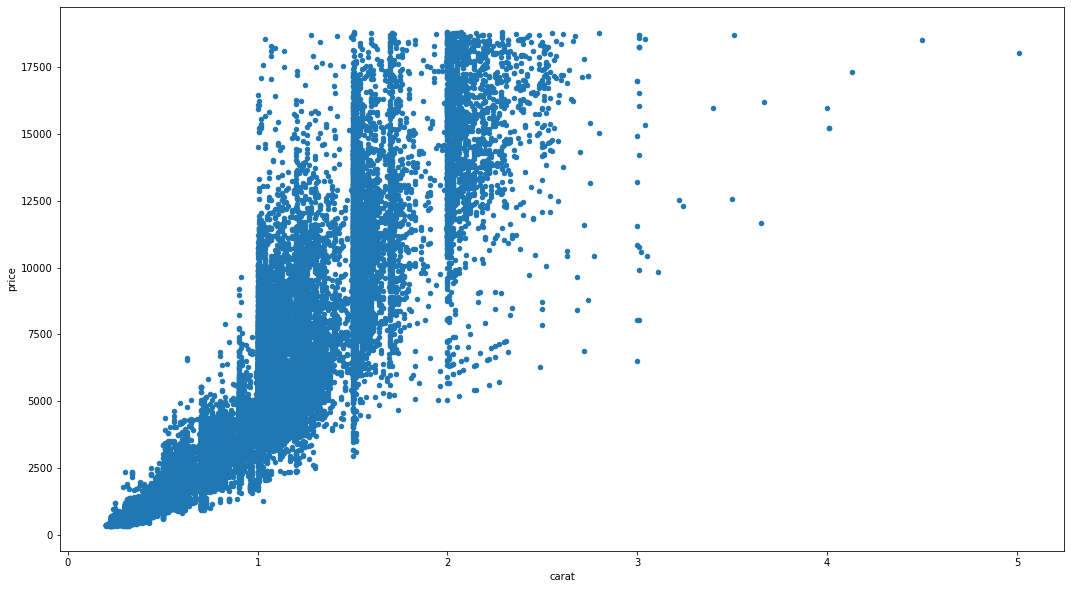

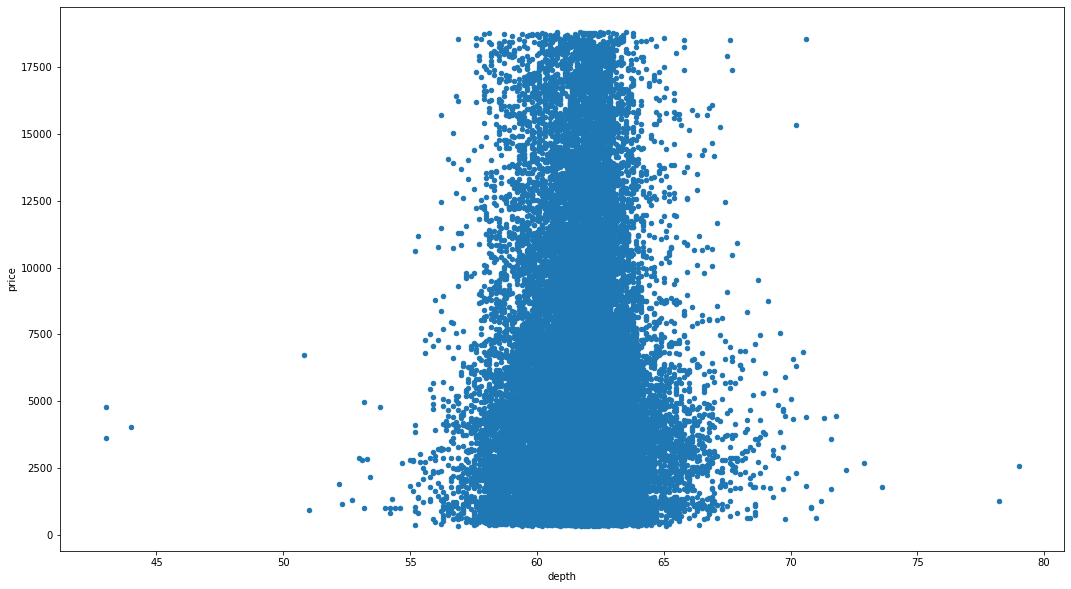

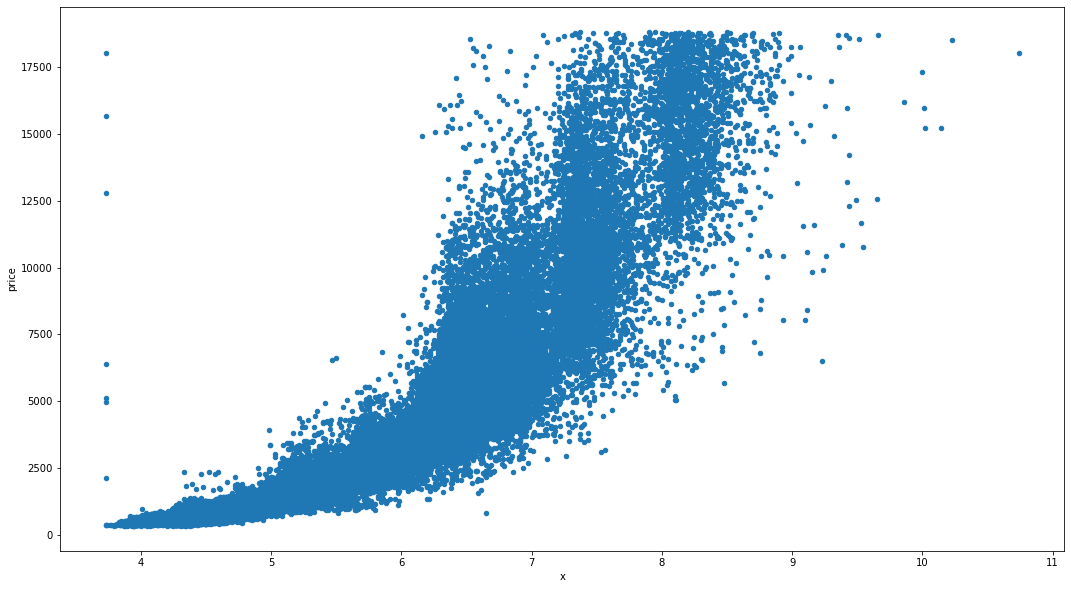

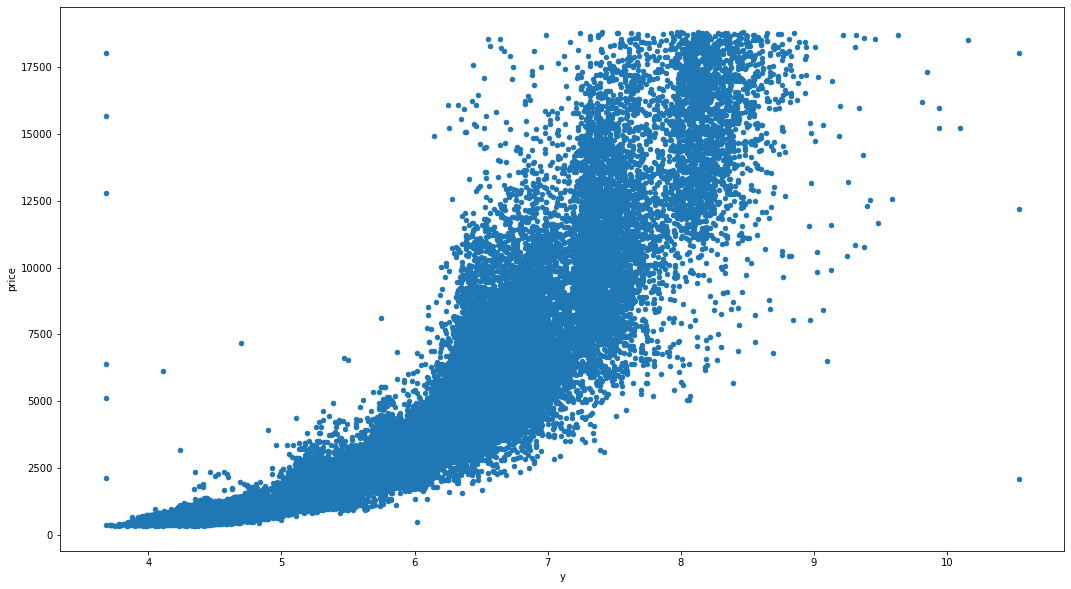

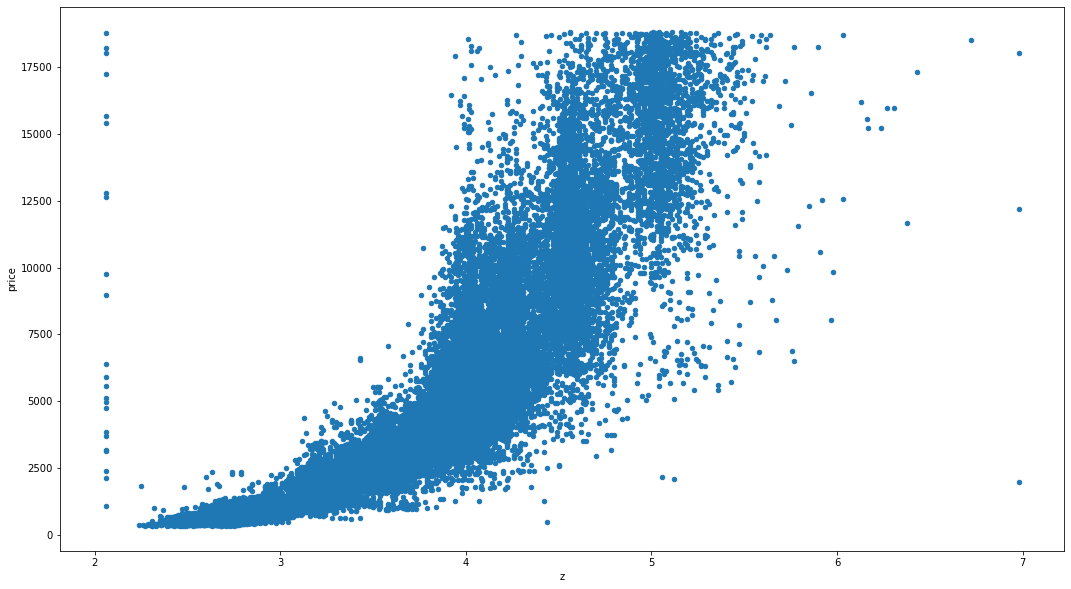

In [23]:
con = ['carat','depth','x','y','z']

for predictor in con :
    DiamondPriceData.plot.scatter(x=predictor,y="price",figsize=(18,10))

After Seeing Scatter plot we can conclude the all continous columns except "depth" has a positive corr with price 

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [24]:
#Calculating Correlation matrix
ContinousCol = ['price','carat','depth','x','y','z']
CorrelationData = DiamondPriceData[ContinousCol].corr()
CorrelationData

,price,carat,depth,x,y,z
price,1.000000,0.921548,-0.011046,0.886413,0.887789,0.879479
carat,0.921548,1.000000,0.027883,0.977278,0.976146,0.973813
depth,-0.011046,0.027883,1.000000,-0.025280,-0.028469,0.096301
x,0.886413,0.977278,-0.025280,1.000000,0.998329,0.989317
y,0.887789,0.976146,-0.028469,0.998329,1.000000,0.989044
z,0.879479,0.973813,0.096301,0.989317,0.989044,1.000000


In [25]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.000000
carat    0.921548
x        0.886413
y        0.887789
z        0.879479
Name: price, dtype: float64

Final selected Continuous columns:

'carat', 'x','y','z'

# Relationship exploration: Categorical Vs Continuous -- Box Plots

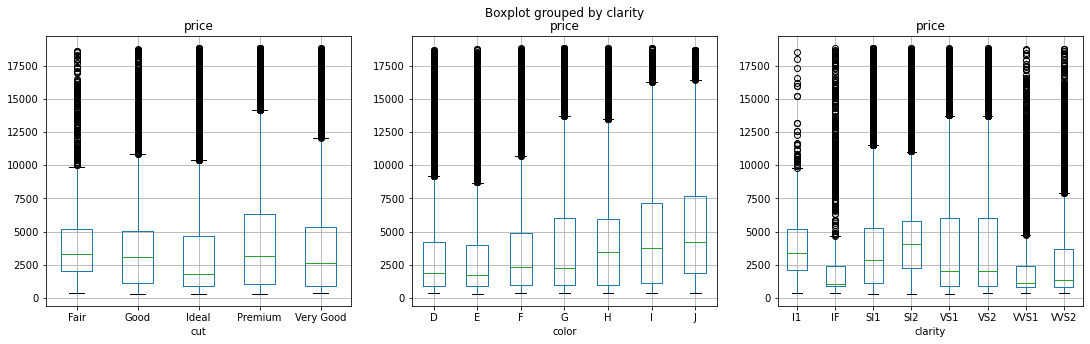

In [26]:
import matplotlib.pyplot as plt
Catcolumns = ['cut','color','clarity']
fig,Plotcanvas = plt.subplots(nrows=1,ncols=len(Catcolumns),figsize=(18,5))

for PredictorCol , i in zip(Catcolumns,range(len(Catcolumns))):
    DiamondPriceData.boxplot(column='price',by=PredictorCol,figsize=(5,5),ax=Plotcanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [28]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=DiamondPriceData, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 1.800084700570961e-147
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 8.6796082976e-313


['cut', 'color', 'clarity']

# Selecting final predictors for Machine Learning

In [29]:
Y = DiamondPriceData["price"]
X = DiamondPriceData.drop(labels = ["price","depth"],axis = 1)

In [30]:
X.shape

(53794, 8)

In [31]:
Y.shape

(53794,)

In [32]:
X.index = range(0,53794,1)
Y.index = range(0,53794,1)

In [33]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53789    2757
53790    2757
53791    2757
53792    2757
53793    2757
Name: price, Length: 53794, dtype: int64

In [34]:
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50
53790,0.72,Good,D,SI1,55.0,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74


# Seperating Categorical and Continous Columns

In [35]:
cat = []
con = []

for i in X.columns:
    if (X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [36]:
cat

['cut', 'color', 'clarity']

In [37]:
con

['carat', 'table', 'x', 'y', 'z']

In [38]:
con.remove('table')

# Standardization Data 

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [40]:
Xnew

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.199402,-1.592213,-1.578231,-1.603244,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.241651,-1.645832,-1.704218,-1.776724,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.199402,-1.502848,-1.497239,-1.776724,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.072656,-1.368801,-1.353254,-1.314111,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.030407,-1.243690,-1.245265,-1.140631,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,-0.164306,0.016354,0.023605,-0.056381,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53790,-0.164306,-0.037265,0.014606,0.102642,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53791,-0.206555,-0.064074,-0.048388,0.030359,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
53792,0.131436,0.373813,0.347572,0.290579,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Finding Outliers 

In [41]:
#creating list for outliers 
outliers = []

for i in Xnew:
    outliers.extend(list(Xnew[Xnew[i]>3].index))
    outliers.extend(list(Xnew[Xnew[i]<-3].index))
    

In [42]:
Xnew.shape

(53794, 24)

In [43]:
from numpy import unique
O = list(unique(outliers))

# Removing Outliers from both x and y

In [44]:
Xnew = Xnew.drop(index=O,axis=0)

In [45]:
Xnew.shape

(53358, 24)

In [46]:
Y = Y.drop(index=O,axis=0)

In [47]:
Y.shape

(53358,)

# Splitting Data into training and testing 

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=42)

In [49]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(37350, 24)
(37350,)
(16008, 24)
(16008,)


# Multiple Linear Regression

In [50]:
#Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()

#print model variables
print(regModel)

#creating model
lrModel= regModel.fit(xtrain,ytrain)
#creating prediction on test data
prediction= lrModel.predict(xtest)
#Measuring Goodness of fit on Training Data
from sklearn.metrics import r2_score
print("R2 score : ", r2_score(ytrain,lrModel.predict(xtrain)))


###########################################################################

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
import numpy as np
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(regModel, Xnew , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 score :  0.9260316814036873

Accuracy values for 10-fold Cross Validation:
 [66.89854387 74.41581289 80.41132221 77.64204266 77.65056746 25.17907225
 27.3519245  34.19277198 57.36079137 68.93729739]

Final Average Accuracy of the model: 59.0


# Decision Tree

In [51]:
#Decision Tree Model 
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth =10,criterion='mse')

#printing Decision Tree Parameters
print(dtr)

#creating model
dtrModel = dtr.fit(xtrain,ytrain)
prediction = dtrModel.predict(xtest)
#Measuring Goodness of fit on training data
from sklearn.metrics import r2_score
print("\nR2 score : ",r2_score(ytrain,dtrModel.predict(xtrain)))


#################################################################

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
import numpy as np
def Accuracy_score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score,greater_is_better=True)

from sklearn.model_selection import cross_val_score
Accuracy_variable = cross_val_score(dtrModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy Value for 10-fold cross validation :\n", Accuracy_variable)
print("\nFinal Average Accuracy of the model : ",round(Accuracy_variable.mean(),2))


DecisionTreeRegressor(max_depth=10)

R2 score :  0.9702140646766756

Accuracy Value for 10-fold cross validation :
 [78.77935634 85.12269142 80.43871282 78.5925052  73.82214535 79.74696609
 80.62278496 76.24710394 79.10440778 77.94514381]

Final Average Accuracy of the model :  79.04


# Random Forest

In [52]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=5,criterion='mse')

#printing Random Forest Params
print(rfr)

#creating model
rfrModel = rfr.fit(xtrain,ytrain)
#prediction on testing data
prediction = rfrModel.predict(xtest)
#finding goodness of fit for the model
from sklearn.metrics import r2_score
print("\nR2 score :",r2_score(ytrain,rfrModel.predict(xtrain)))

####################################################################
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_scoring(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_scoring,greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(rfrModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy for 10-fold cross validation :\n",Accuracy_values)
print("\nFinal Average Accuracy of the model : ", round(Accuracy_values.mean(),2))

RandomForestRegressor(max_depth=5)

R2 score : 0.9151272474301875

Accuracy for 10-fold cross validation :
 [70.15981129 67.3388303  79.04558085 69.82717079 72.88047176 78.9555419
 76.70037424 67.52388281 75.83102987 73.77928666]

Final Average Accuracy of the model :  73.2


# AdaBoost 

In [53]:
#Adaboost Model 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10)
abr = AdaBoostRegressor(n_estimators=100,base_estimator=dtr,learning_rate=0.01)

#print params of Adaboost
print(abr)

#creating model 
abrModel = abr.fit(xtrain,ytrain)
#prediction on test data
prediction = abrModel.predict(xtest)
#Finding Goodness of fit of the model
from sklearn.metrics import r2_score
print("\nR2 score : ",r2_score(ytrain,abrModel.predict(xtrain)))

#################################################################################
# Defining a custom function to calculate accuracy 
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score,greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(abrModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy score for 10-fold cross validation : \n",Accuracy_values)
print("\nFinal Average Accuracy of the model : ",round(Accuracy_values.mean(),2))
                

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)

R2 score :  0.9749367339348444

Accuracy score for 10-fold cross validation : 
 [79.18467586 84.65686882 81.60879778 78.95169043 76.17838933 80.88617949
 80.46480637 75.33242402 79.62515847 78.79837615]

Final Average Accuracy of the model :  79.57


# KNN

In [54]:
#K-nearest Neighbor model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)

#printing param of knn
print(knn)
#creating model 
knnModel = knn.fit(xtrain,ytrain)
#prediction on testing data 
prediction = knnModel.predict(xtest)
#Finding Goodness of fit of model
print("\nR2 score : ",r2_score(ytrain,knnModel.predict(xtrain)))

##################################################################

# Defining a custom function to calculate accuracy 
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score,greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(knnModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy score for 10-fold cross validation : \n",Accuracy_values)
print("\nFinal Average Accuracy of the model : ",round(Accuracy_values.mean(),2))

KNeighborsRegressor(n_neighbors=4)

R2 score :  0.9850053430985057

Accuracy score for 10-fold cross validation : 
 [83.99702901 87.02471324 86.29659673 84.46272775 79.70744197 81.79010552
 83.97441206 82.8761542  83.52887934 84.81140611]

Final Average Accuracy of the model :  83.85


In [55]:
#Creating Test data
test = pd.read_csv("F:/Course/Pandas/Csv/DiamondPricesData.csv")

In [56]:
test

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [59]:
test1 = test.drop(labels=["price","depth","table"],axis=1)

In [60]:
test1

,carat,cut,color,clarity,x,y,z
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,5.75,5.76,3.50
53936,0.72,Good,D,SI1,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,6.15,6.12,3.74


In [61]:
cat = []
con = []

for i in test1.columns:
    if (test1[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [62]:
#Standardization of testing data
ss = StandardScaler()
test2 = pd.DataFrame(ss.fit_transform(test1[con]),columns=con)
test3 = pd.get_dummies(test1[cat])
testnew = test2.join(test3)

In [63]:
testnew

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-1.587837,-1.536196,-1.571129,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.641325,-1.658774,-1.741175,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-1.498691,-1.457395,-1.741175,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,-1.364971,-1.317305,-1.287720,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029394,-1.240167,-1.212238,-1.117674,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,0.016798,0.022304,-0.054888,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,-0.164427,-0.036690,0.013548,0.100988,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,-0.206621,-0.063434,-0.047741,0.030135,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.130927,0.373383,0.337506,0.285204,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
pred_test = knnModel.predict(testnew)

In [65]:
test["Pred_price"] = pred_test

In [66]:
test

,price,carat,cut,color,clarity,depth,table,x,y,z,Pred_price
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,390.75
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,569.50
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,359.50
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,439.00
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,433.50
...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2872.75
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2865.50
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2755.25
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2860.75


In [68]:
test.to_csv("Desktop/DiamondPredictedPrice.csv")